In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade tensorflow
import os
import numpy as np
import random
from PIL import Image, ImageEnhance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have te

In [ ]:
train_data='/content/drive/MyDrive/tumer_dataset/Training'
test_data='/content/drive/MyDrive/tumer_dataset/Testing'

In [ ]:
#reading image and level
#make an empty list
train_paths=[] #removed extra space at beginning of the line
train_labels=[]

for label in os.listdir(train_data):
  print(label)

pituitary
meningioma
glioma
notumor


In [ ]:
#read each image in the directory and use suffle function not to overload the image
# eta mane e holo directory theke ektar pr ekta image nibe ""for label in os.listdir()""
train_paths=[]
train_labels=[]
for label in os.listdir(train_data):
  for image in os.listdir(os.path.join(train_data,label)):
    train_paths.append((os.path.join(train_data, label, image)))
    train_labels.append(label)


train_paths, train_labels=shuffle(train_paths, train_labels)

In [ ]:
test_paths=[]
test_labels=[]
for label in os.listdir(test_data):
  for image in os.listdir(os.path.join(test_data,label)):
    test_paths.append((os.path.join(test_data, label, image)))
    test_labels.append(label)


test_paths, test_labels=shuffle(test_paths, test_labels)


In [ ]:
#picking random image and show their index
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
random_indices= random.sample(range(len(train_paths)),10)
random_indices

[5022, 3470, 5614, 3277, 4308, 5240, 980, 201, 4223, 4152]

In [ ]:
#previous code just showing any 10 random image index
#how to create a plot
# fix, axes=plt.subplots(2,5,figsize=(15,6))
# axes=axes.ravel()
# #loop to show image
# for i, index in enumerate(random_indices):
#   print(i,index)

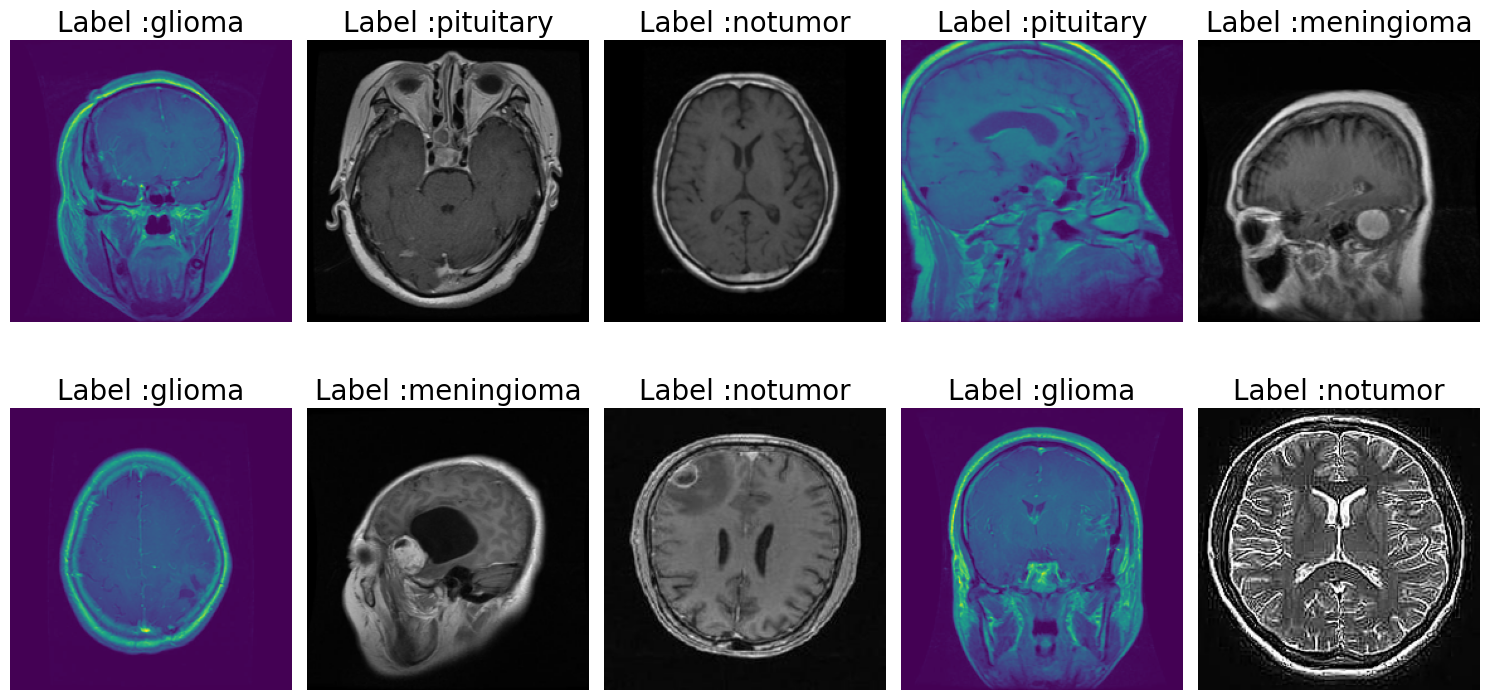

In [ ]:
fix, axes=plt.subplots(2,5,figsize=(15,8))
axes=axes.ravel()
#loop to show image
for i, index in enumerate(random_indices):
  img_path=train_paths[index]
  img=Image.open(img_path)
  img=img.resize((224,224))
  #display
  axes[i].imshow(img)
  axes[i].axis('off')
  #showing the class
  axes[i].set_title(f"Label :{train_labels[index]}",fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# #IMAGE PROCESSING
# #1)Augmentation image function making
# def augmented_image(image):
#   # The function `Image.formarray` should be `Image.fromarray`.
#   image=Image.fromarray(np.uint8(image))
#   image=ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
#   image=ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
#   image=ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
#   #normalization
#   image=np.array(image)/255.0

#   return image

# #real image with in pixel form ,
# def open_image(paths):
#   images=[]
#   for path in paths:
#    img=load_img(path,target_size=(128,128))
#    img=augmented_image(img)
#    images.append(img)
#   return np.array(images)

# #encoder labels (convert label name to integer)
# def encoder_label(lables):
#   unique_label=os.listdir(train_data)
#   # The variable `unique_labels` should be `unique_label`.
#   encoder=[unique_label.index(label) for label in lables]
#   return encoder


#  #data generator for batching
# def datagen(paths,labels,batch_size=12,epochs=1):
#   for _ in range(epochs):
#     for i in range(0, len(paths), batch_size):
#       batch_paths=paths[i:i+batch_size]
#       batch_images=open_image(batch_paths)
#       batch_labels=labels[i:i+batch_size]
#       # The batch_images variable is being overwritten here.
#       # The encoded labels should be assigned to a different variable, like batch_labels_encoded.
#       # Additionally, the variable batch_lables should be batch_labels.
#       batch_labels_encoded = encoder_label(batch_labels)
#       yield batch_images, batch_labels_encoded








In [ ]:
#IMAGE PROCESSING
#1)Augmentation image function making
def augmented_image(image):
  # The function `Image.formarray` should be `Image.fromarray`.
  image=Image.fromarray(np.uint8(image))
  image=ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
  image=ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
  image=ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
  #normalization
  image=np.array(image)/255.0

  return image

#real image with in pixel form ,
def open_image(paths):
  images=[]
  for path in paths:
   image=load_img(path,target_size=(128,128))
   image=augmented_image(image)
   images.append(image)
  return np.array(images)

#encoder labels (convert label name to integer)
def encoder_label(lables):
  unique_labels=os.listdir(train_data)
  # The variable `unique_labels` should be `unique_label`.
  encoder=[unique_labels.index(label) for label in lables]
  return encoder


 #data generator for batching
def datagen(paths,labels,batch_size=12,epochs=1):
  for _ in range(epochs):
    for i in range(0, len(paths), batch_size):
      batch_paths=paths[i:i+batch_size]
      batch_images=open_image(batch_paths)
      batch_labels=labels[i:i+batch_size]
      # The batch_images variable is being overwritten here.
      # The encoded labels should be assigned to a different variable, like batch_labels_encoded.
      # Additionally, the variable batch_lables should be batch_labels.
      batch_labels = encoder_label(batch_labels)
      # Convert batch_labels_encoded to a NumPy array before yielding
      # yield batch_images, batch_labels
      yield batch_images, np.array(batch_labels)

In [ ]:
len(os.listdir(train_data))

4

In [ ]:
#model architecture
IMAGE_SIZE=128
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
#VGG16 is a pretrain model ,jeta imagenet namok data set er upr trained
#freeze all layes of VGG16
for layer in base_model.layers:
  layer.trainable= False
#set only a few layer
base_model.layers[-2].trainable=True
base_model.layers[-3].trainable=True
base_model.layers[-4].trainable=True

#build model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(len(os.listdir(train_data)),activation='softmax'))#model.add(4) erkom hole o hbe

from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy(for binary)', metrics=['categorical_crossentropy_accuracy'])

batch_size=20
steps=int(len(train_paths)/batch_size)
epochs=5

history=model.fit(datagen(train_paths, train_labels, batch_size= batch_size, epochs=epochs),
                epochs=epochs, steps_per_epoch=steps )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 1230s 4s/step - loss: 0.6468 - sparse_categorical_accuracy: 0.7551
Epoch 2/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - loss: 0.2485 - sparse_categorical_accuracy: 0.9100
Epoch 3/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - loss: 0.1771 - sparse_categorical_accuracy: 0.9300
Epoch 4/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 32s 111ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9504
Epoch 5/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 32s 110ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9669


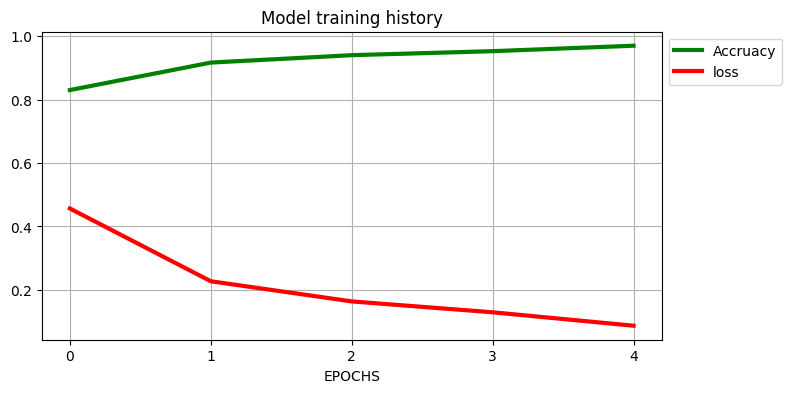

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'],'g',linewidth=3)
plt.plot(history.history['loss'],'r',linewidth=3)
plt.title('Model training history')
plt.xlabel('EPOCHS')
plt.xticks([x for x in range(epochs)]) # Corrected xtricks to xticks
plt.legend(['Accruacy','loss'],loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
# Corrected function name from open_images to open_image
test_images = open_image(test_paths)  # Load and augment test images
test_labels_encoded = encoder_label(test_labels)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))


42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       310
           1       0.92      0.92      0.92       308
           2       0.91      0.95      0.93       310
           3       0.98      1.00      0.99       405

    accuracy                           0.95      1333
   macro avg       0.95      0.95      0.95      1333
weighted avg       0.95      0.95      0.95      1333



Confusion Matrix:
[[287   8  11   4]
 [  1 284  19   4]
 [  0  15 295   0]
 [  0   1   0 404]]


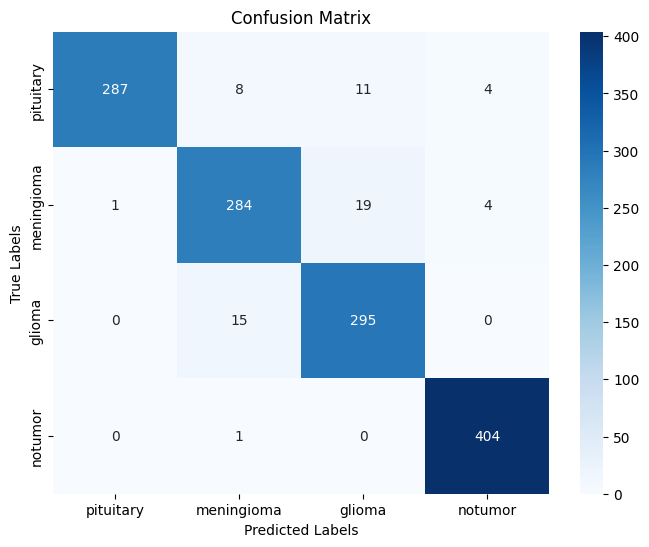

In [ ]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_data), yticklabels=os.listdir(train_data))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


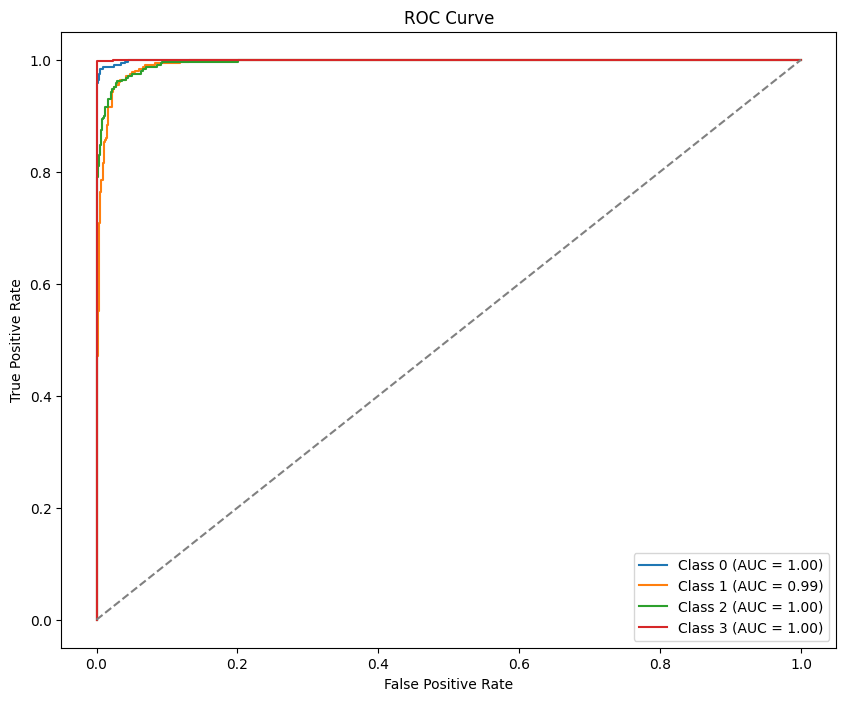

In [ ]:
# 4. ROC Curve and AUC(1.15-17 )
# Binarize the test labels and predictions for multi-class ROC
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(os.listdir(train_data))))
test_predictions_bin = test_predictions  # The predicted probabilities for each class

# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_data))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_data))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the entire model
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['glioma','meningioma','notumor','pituitary']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


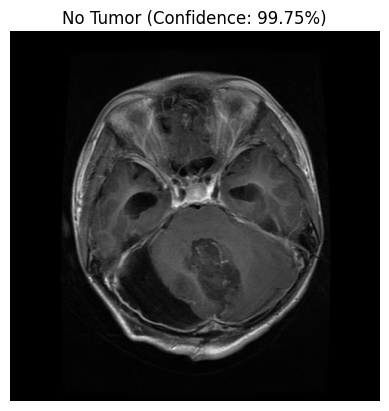

In [ ]:
image_path = '/content/drive/MyDrive/tumer_dataset/Testing/glioma/Te-glTr_0000.jpg'
detect_and_display(image_path, model)